Chapter 14
# NumPy索引和切片
Book_1《编程不难》 | 鸢尾花书：从加减乘除到机器学习  

In [2]:
# 导入包
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from matplotlib import cm 
# 导入色谱

import os

# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

## 定义可视化函数

In [10]:
def visualize_2D(array, title, vmax, vmin):
    
    fig_width  = math.ceil(array.shape[1] * 0.5)
    fig_length = math.ceil(array.shape[0] * 0.5)
    
    fig, ax = plt.subplots(figsize=(fig_width, fig_length))
    # 注意，seaborn.heatmap() 目前只能接受2D数组
    # 本书中，一维数组可视化时用圆圈
    # 可视化时，只有二维、三维数组用方块
    
    sns.heatmap(array, 
                vmax = vmax,
                vmin = vmin,
                annot = True,      # 增加注释
                fmt = ".0f",       # 注释数值的格式
                square = True,     # 热图方格为正方形
                cmap = 'RdYlBu_r', # 指定色谱
                linewidths = .5,   # 方格线宽
                cbar = False,      # 不显示色谱条
                yticklabels=False, # 不显示纵轴标签
                xticklabels=False, # 不显示横轴标签
                ax = ax)           # 指定绘制热图的轴
    
    fig.savefig('Figures/' + title + '.svg', format='svg')

# 定义绘制一元数组可视化函数

def visualize_1D(array, title):
    fig, ax = plt.subplots()

    colors = cm.RdYlBu_r(np.linspace(0,1,len(array)))

    for idx in range(len(array)):

        circle_idx = plt.Circle((idx, 0), 0.5, facecolor=colors[idx], edgecolor = 'w')
        ax.add_patch(circle_idx)
        ax.text(idx, 0, s = str(array[idx]),
                horizontalalignment = 'center',
                verticalalignment = 'center')

    ax.set_xlim(-0.6, 0.6 + len(array))
    ax.set_ylim(-0.6, 0.6)
    ax.set_aspect('equal', adjustable='box')
    ax.axis('off')
    fig.savefig('Figures/' + title + '.svg', format='svg')

## 一维数组

### 定义一维数组

In [3]:
a_1D_array = np.arange(-5, 5 + 1)

In [4]:
a_1D_array.shape

(11,)

In [5]:
a_1D_array.ndim

1

In [6]:
len(a_1D_array)

11

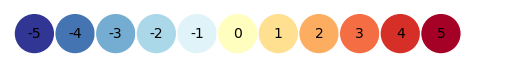

In [7]:
visualize_1D(a_1D_array, '一维数组')

### 索引

In [8]:
# 第一个元素，索引为0
a_1D_array[0]

-5

In [9]:
a_1D_array[-11]

-5

In [10]:
# 最后一个元素，索引为-1 或 len(a_1D_array) - 1
a_1D_array[-1]

5

In [11]:
a_1D_array[len(a_1D_array) - 1]

5

In [12]:
a_1D_array[10]

5

In [13]:
# 倒数第二个元素，索引为-2 或len(a_1D_array) - 2
a_1D_array[-2]

4

### 行向量、列向量

In [14]:
# 转为列向量
a_1D_array[:, np.newaxis]

array([[-5],
       [-4],
       [-3],
       [-2],
       [-1],
       [ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5]])

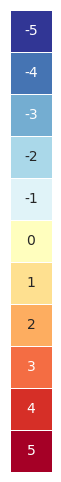

In [15]:
visualize_2D(a_1D_array[:, np.newaxis], '列向量', 5, -5)

In [16]:
a_1D_array[:, np.newaxis].ndim

2

In [17]:
a_1D_array[:, None]

array([[-5],
       [-4],
       [-3],
       [-2],
       [-1],
       [ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5]])

In [18]:
a_1D_array.reshape(-1,1)

array([[-5],
       [-4],
       [-3],
       [-2],
       [-1],
       [ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5]])

In [19]:
a_1D_array[:, np.newaxis].squeeze()
# 二维到一维

array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5])

In [20]:
# 转为行向量
a_1D_array[np.newaxis, :]

array([[-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5]])

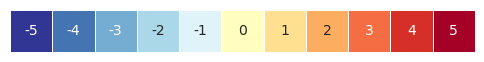

In [21]:
visualize_2D(a_1D_array[np.newaxis, :], '行向量', 5, -5)

In [22]:
a_1D_array[None, :]

array([[-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5]])

In [23]:
a_1D_array.reshape(1,-1)

array([[-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5]])

In [24]:
a_1D_array[np.newaxis, :] @ a_1D_array[:, np.newaxis]

array([[110]])

In [25]:
a_1D_array[:, np.newaxis] @ a_1D_array[np.newaxis, :]

array([[ 25,  20,  15,  10,   5,   0,  -5, -10, -15, -20, -25],
       [ 20,  16,  12,   8,   4,   0,  -4,  -8, -12, -16, -20],
       [ 15,  12,   9,   6,   3,   0,  -3,  -6,  -9, -12, -15],
       [ 10,   8,   6,   4,   2,   0,  -2,  -4,  -6,  -8, -10],
       [  5,   4,   3,   2,   1,   0,  -1,  -2,  -3,  -4,  -5],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,   4,   5],
       [-10,  -8,  -6,  -4,  -2,   0,   2,   4,   6,   8,  10],
       [-15, -12,  -9,  -6,  -3,   0,   3,   6,   9,  12,  15],
       [-20, -16, -12,  -8,  -4,   0,   4,   8,  12,  16,  20],
       [-25, -20, -15, -10,  -5,   0,   5,  10,  15,  20,  25]])

In [26]:
a_1D_array[:, np.newaxis, np.newaxis]
# 三维

array([[[-5]],

       [[-4]],

       [[-3]],

       [[-2]],

       [[-1]],

       [[ 0]],

       [[ 1]],

       [[ 2]],

       [[ 3]],

       [[ 4]],

       [[ 5]]])

In [27]:
a_1D_array[:, np.newaxis, np.newaxis].squeeze()
# 从三维到一维

array([-5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5])

### 切片

#### 获取数组中的前三个元素

In [28]:
a_1D_array[:3]

array([-5, -4, -3])

In [29]:
a_1D_array[0:3]

array([-5, -4, -3])

In [30]:
a_1D_array[[0, 1, 2]]

array([-5, -4, -3])

#### 获取数组中的第二个、三个元素

In [31]:
a_1D_array[1:3]

array([-4, -3])

In [32]:
a_1D_array[[1, 2]]

array([-4, -3])

#### 获取数组中的最后三个元素

In [33]:
a_1D_array[-3:]

array([3, 4, 5])

In [34]:
a_1D_array[8:]

array([3, 4, 5])

In [35]:
len(a_1D_array)

11

In [36]:
a_1D_array[len(a_1D_array)-3:]

array([3, 4, 5])

In [37]:
a_1D_array[[-3, -2, -1]]

array([3, 4, 5])

### 设定步长

#### 取出所有奇数

In [38]:
a_1D_array[::2]

array([-5, -3, -1,  1,  3,  5])

In [39]:
a_1D_array[0:-1:2]
# 注意，这句代码取出的几个元素，包括第一个元素，但是不包括最后一个元素

array([-5, -3, -1,  1,  3])

#### 取出所有偶数

In [40]:
a_1D_array[1::2]

array([-4, -2,  0,  2,  4])

#### 倒序

In [41]:
a_1D_array[::-1]

array([ 5,  4,  3,  2,  1,  0, -1, -2, -3, -4, -5])

In [42]:
a_1D_array[::-2]

array([ 5,  3,  1, -1, -3, -5])

In [43]:
a_1D_array[-1:2:-1]

array([ 5,  4,  3,  2,  1,  0, -1, -2])

In [44]:
a_1D_array[-1:2:-2]

array([ 5,  3,  1, -1])

#### 其他步长设置

In [45]:
a_1D_array[:-3:2]

array([-5, -3, -1,  1])

In [46]:
a_1D_array[1:-1:2]

array([-4, -2,  0,  2,  4])

In [47]:
a_1D_array[::3]

array([-5, -2,  1,  4])

In [48]:
a_1D_array[1::3]

array([-4, -1,  2,  5])

### 整数索引

In [49]:
# 获取，第一、二 三，和最后一个元素
a_1D_array[[0, 1, 2, -1]]

array([-5, -4, -3,  5])

In [50]:
a_1D_array[np.r_[0:3, -1]]

# numpy.r_ 是一个用于将切片对象转换为一个沿着第一个轴堆叠的 NumPy 数组的函数。
# 它可以在数组创建和索引时使用。
# 它的作用类似于 numpy.concatenate 和 numpy.vstack，
# 但是使用切片对象作为索引来方便快捷地创建数组。

array([-5, -4, -3,  5])

In [51]:
# 或者采用合并
first_three = a_1D_array[:3]   # 获取前三个元素
last_one    = a_1D_array[-1:]  # 获取最后一个元素
np.concatenate((first_three[:3], last_one[-1:]))

array([-5, -4, -3,  5])

### 布尔索引

In [52]:
# 大于 1 的元素
bool_greater_than_1 = a_1D_array > 1
bool_greater_than_1

array([False, False, False, False, False, False, False,  True,  True,
        True,  True])

In [53]:
a_1D_array[bool_greater_than_1]

array([2, 3, 4, 5])

In [54]:
a_1D_array[a_1D_array > 1]

array([2, 3, 4, 5])

In [55]:
# 大于等于 0 的元素
bool_greater_than_eq_0 = a_1D_array >= 0
bool_greater_than_eq_0

array([False, False, False, False, False,  True,  True,  True,  True,
        True,  True])

In [56]:
a_1D_array[bool_greater_than_eq_0]

array([0, 1, 2, 3, 4, 5])

In [57]:
a_1D_array[a_1D_array >= 0]

array([0, 1, 2, 3, 4, 5])

In [58]:
# 小于 0 的元素
bool_less_than_0 = a_1D_array < 0
bool_less_than_0

array([ True,  True,  True,  True,  True, False, False, False, False,
       False, False])

In [59]:
a_1D_array[bool_less_than_0]

array([-5, -4, -3, -2, -1])

In [60]:
a_1D_array[a_1D_array < 0]

array([-5, -4, -3, -2, -1])

In [61]:
bool_less_than_eq_0 = a_1D_array <= 0
bool_less_than_eq_0

array([ True,  True,  True,  True,  True,  True, False, False, False,
       False, False])

In [62]:
a_1D_array[bool_less_than_eq_0]

array([-5, -4, -3, -2, -1,  0])

In [63]:
a_1D_array[a_1D_array <= 0]

array([-5, -4, -3, -2, -1,  0])

In [64]:
### 大于-3，小于3的元素

In [65]:
a_1D_array[(a_1D_array < 3) & (a_1D_array > -3)]

array([-2, -1,  0,  1,  2])

In [66]:
a_1D_array_copy_1 = np.copy(a_1D_array)

a_1D_array_copy_1[a_1D_array_copy_1 <= 0] = 100
a_1D_array_copy_1

array([100, 100, 100, 100, 100, 100,   1,   2,   3,   4,   5])

In [67]:
a_1D_array_copy_2 = np.copy(a_1D_array)
a_1D_array_copy_2[(a_1D_array_copy_2 < 3) & (a_1D_array_copy_2 > -3)] = 100
a_1D_array_copy_2

array([ -5,  -4,  -3, 100, 100, 100, 100, 100,   3,   4,   5])

## 视图 vs 副本

In [4]:
# 创建一个一维数组
a = np.array([1, 2, 3, 4, 5])
# 创建一个切片视图
s = a[1:3]
# 修改视图中的数据
s[0] = 1000
# 查看原始数组
print(a) # 输出：[1000 0 3 4 5]

# 创建一个整数数组索引副本
c = a[[1, 3]].copy()
# 修改副本中的数据
c[0] = 888

# 查看原始数组
print(a) # 输出：[1000 0 3 4 5]
print(c)

[   1 1000    3    4    5]
[   1 1000    3    4    5]
[888   4]


In [7]:
# 创建一个3x3的数组
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
# 使用a[:, np.newaxis]创建一个新的视图
b = a[:, np.newaxis]
# 修改b中的值
b[0, 0, 0] = 1000
# 打印原始数组a
print(a)
# a[:, numpy.newaxis] 返回的是原始数组的一个视图，而不是副本

[[1000    2    3]
 [   4    5    6]
 [   7    8    9]]


## 二维数组

### 定义二维数组

In [26]:
A_2D = np.array([[-7,-6,-5,-4,-3],
                 [-2,-1, 0, 1, 2],
                 [ 3, 4, 5, 6, 7]])

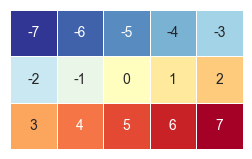

In [11]:
visualize_2D(A_2D, '二维数组', 7, -7)

### 索引

#### 取出单一元素

In [72]:
A_2D[0, 0]

-7

In [12]:
type(A_2D[0, 0])

numpy.int64

In [13]:
A_2D[[0], [0]]

array([-7])

In [14]:
type(A_2D[[0], [0]])

numpy.ndarray

In [15]:
A_2D[1,2]

np.int64(0)

In [16]:
A_2D[[1], [2]]

array([0])

In [17]:
A_2D[1][2]

np.int64(0)

#### 取出行

In [18]:
# 取出第一行，结果为一维向量
A_2D[0]

array([-7, -6, -5, -4, -3])

In [19]:
A_2D[0, :]

array([-7, -6, -5, -4, -3])

In [20]:
A_2D[1]

array([-2, -1,  0,  1,  2])

In [21]:
A_2D[1, :]

array([-2, -1,  0,  1,  2])

In [22]:
# 取出第一行，结果为二维行向量
A_2D[[0],:]

array([[-7, -6, -5, -4, -3]])

In [23]:
A_2D[0, np.newaxis]

array([[-7, -6, -5, -4, -3]])

In [24]:
A_2D[[0, 2]]

array([[-7, -6, -5, -4, -3],
       [ 3,  4,  5,  6,  7]])

In [25]:
A_2D[[0, 2], :]

array([[-7, -6, -5, -4, -3],
       [ 3,  4,  5,  6,  7]])

#### 取出列

In [27]:
A_2D[:,0]

array([-7, -2,  3])

In [28]:
A_2D[...,0]

array([-7, -2,  3])

In [29]:
A_2D[:,0, np.newaxis]

array([[-7],
       [-2],
       [ 3]])

In [30]:
A_2D[:,[0]]

array([[-7],
       [-2],
       [ 3]])

In [31]:
A_2D[np.newaxis, :,0]

array([[-7, -2,  3]])

In [32]:
A_2D[:,1]

array([-6, -1,  4])

In [33]:
A_2D[:,[0,2,4]]

array([[-7, -5, -3],
       [-2,  0,  2],
       [ 3,  5,  7]])

In [34]:
A_2D[:,0::2]

array([[-7, -5, -3],
       [-2,  0,  2],
       [ 3,  5,  7]])

#### 取出特定行列组合

In [35]:
A_2D[1,2::]

array([0, 1, 2])

In [36]:
A_2D[np.newaxis, 1,2::]

array([[0, 1, 2]])

In [37]:
A_2D[1,2::, np.newaxis]

array([[0],
       [1],
       [2]])

In [38]:
A_2D[1::,[0,2,4]]

array([[-2,  0,  2],
       [ 3,  5,  7]])

In [39]:
A_2D[1::,0::2]

array([[-2,  0,  2],
       [ 3,  5,  7]])

In [40]:
A_2D[::2,:-1:2]

array([[-7, -5],
       [ 3,  5]])

In [93]:
# 二次切片
A_2D[:,[0,2]][[0, 2], :]

array([[-7, -5],
       [ 3,  5]])

In [41]:
A_2D[[0, 2], :][:,[0,2]]

array([[-7, -5],
       [ 3,  5]])

#### 使用np.ix_()

In [43]:
A_2D[np.ix_([0, 2], [0, 2])]

array([[-7, -5],
       [ 3,  5]])

### 布尔索引

In [44]:
A_2D > 0

array([[False, False, False, False, False],
       [False, False, False,  True,  True],
       [ True,  True,  True,  True,  True]])

In [46]:
A_2D[A_2D > 0]

array([1, 2, 3, 4, 5, 6, 7])

In [47]:
A_2D[A_2D > 0, np.newaxis]

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7]])

In [48]:
A_2D[np.newaxis, A_2D > 0]

array([[1, 2, 3, 4, 5, 6, 7]])

In [49]:
A_2D < 4

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True, False, False, False, False]])

In [50]:
(A_2D > 0).sum()

np.int64(7)

## 三维数组

In [51]:
### 生成三维数组

In [53]:
A_3D = np.arange(-30, 30).reshape(3,4,5)
A_3D

array([[[-30, -29, -28, -27, -26],
        [-25, -24, -23, -22, -21],
        [-20, -19, -18, -17, -16],
        [-15, -14, -13, -12, -11]],

       [[-10,  -9,  -8,  -7,  -6],
        [ -5,  -4,  -3,  -2,  -1],
        [  0,   1,   2,   3,   4],
        [  5,   6,   7,   8,   9]],

       [[ 10,  11,  12,  13,  14],
        [ 15,  16,  17,  18,  19],
        [ 20,  21,  22,  23,  24],
        [ 25,  26,  27,  28,  29]]])

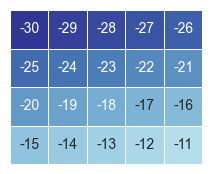

In [54]:
visualize_2D(A_3D[0], '三维数组，第1页', 30, -30)

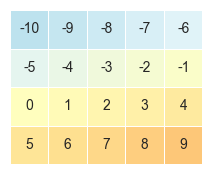

In [55]:
visualize_2D(A_3D[1], '三维数组，第2页', 30, -30)

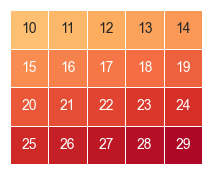

In [56]:
visualize_2D(A_3D[2], '三维数组，第3页', 30, -30)

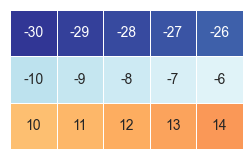

In [57]:
visualize_2D(A_3D[:,0,:], '三维数组，第1行', 30, -30)

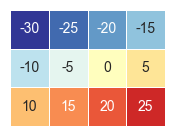

In [58]:
visualize_2D(A_3D[:,:,0], '三维数组，第1列', 30, -30)

In [59]:
# 取出单一元素
A_3D[0, 0, 0]

np.int64(-30)

In [60]:
A_3D[[0], [0], [0]]

array([-30])

In [61]:
A_3D[0, -1, :]

array([-15, -14, -13, -12, -11])

In [62]:
A_3D[0, 1, :]

array([-25, -24, -23, -22, -21])

In [63]:
# 使用省略号
A_3D[1,...]

array([[-10,  -9,  -8,  -7,  -6],
       [ -5,  -4,  -3,  -2,  -1],
       [  0,   1,   2,   3,   4],
       [  5,   6,   7,   8,   9]])

In [64]:
A_3D[...,1]

array([[-29, -24, -19, -14],
       [ -9,  -4,   1,   6],
       [ 11,  16,  21,  26]])

In [65]:
# 使用take
np.take(A_3D, [0,2], axis=1)
# copy or view?

array([[[-30, -29, -28, -27, -26],
        [-20, -19, -18, -17, -16]],

       [[-10,  -9,  -8,  -7,  -6],
        [  0,   1,   2,   3,   4]],

       [[ 10,  11,  12,  13,  14],
        [ 20,  21,  22,  23,  24]]])

## 参考阅读

更多有关NumPy索引和切片，请参考：  
https://numpy.org/doc/stable/user/how-to-index.html  
https://numpy.org/doc/stable/user/basics.indexing.html

In [115]:
# Repo: https://github.com/Visualize-ML
# Book 1 Python for Beginners  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023